# Student Clusttering 

In [1]:
#Importing dependencies for model
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import silhouette_score
import seaborn as sns

# Understanding Data 

In [2]:
df=pd.read_csv('data01.csv')

In [3]:
df.head()  

,RollNo,math_score,reading_score,writing_score
0,1,72,72,74
1,2,69,90,88
2,3,90,95,93
3,4,47,57,44
4,5,76,78,75


The dataset contains four coulmns. The fisrt column refers to student identity and rest three columns are students score in maths, reading and writing. 

In [4]:
df.shape

(1000, 4)

In [5]:
df.describe()

,RollNo,math_score,reading_score,writing_score
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,66.199000,69.285000,68.112000
std,288.819436,15.371196,14.957925,15.244929
min,1.000000,0.000000,17.000000,10.000000
25%,250.750000,57.000000,59.000000,58.000000
50%,500.500000,66.000000,70.000000,69.000000
75%,750.250000,77.000000,79.250000,79.000000
max,1000.000000,150.000000,150.000000,110.000000


The dataset consists score of Thousand students; that is a very small dataset. The accuracy of machine learning algorithm increases with the increase in size of dataset. Maximum score of student in each class subject is 100. Twenty five, fifty and seventy five percentile score of students in each subject is described. Mean score of class can als be determined from the above table.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   RollNo         1000 non-null   int64
 1   math_score     1000 non-null   int64
 2   reading_score  1000 non-null   int64
 3   writing_score  1000 non-null   int64
dtypes: int64(4)
memory usage: 31.4 KB


In [7]:
df.isnull().sum()

RollNo           0
math_score       0
reading_score    0
writing_score    0
dtype: int64

The above dataset doesn't contain any null or NA value.

# Visualising Variables

Using matplotlib and seaborn libraries the data columns and variables can be visualised. The plots predicts data distribution in scale. 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


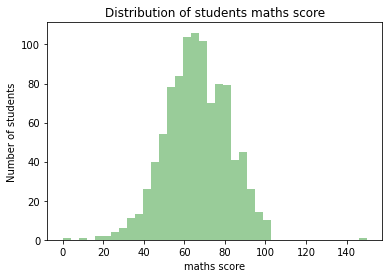

In [8]:
sns.distplot(df['math_score'], color='g', kde=False)
plt.title('Distribution of students maths score')
plt.ylabel('Number of students')
plt.xlabel('maths score')
plt.savefig('math_score.png')

In [9]:
df['math_score'].skew()

-0.12119712913509888

The dataset shows math scores are negatively skewed. The marks of majority of students lies between 60-70 from the fact that the graph has peakedness. Similarly, the reading and writing score of students can be visualised. 

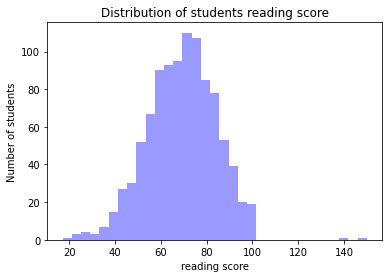

In [10]:
sns.distplot(df['reading_score'], color='b', kde=False)
plt.title('Distribution of students reading score')
plt.ylabel('Number of students')
plt.xlabel('reading score')
plt.savefig('reading_score.png')

In [11]:
df['reading_score'].skew()

-0.008302990780161142

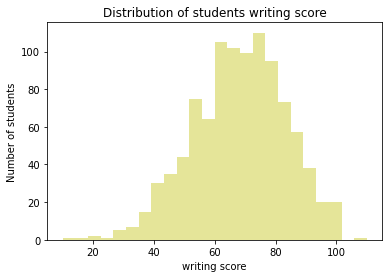

In [12]:
sns.distplot(df['writing_score'], color='y', kde=False)
plt.title('Distribution of students writing score')
plt.ylabel('Number of students')
plt.xlabel('writing score')
plt.savefig('writing score.png')

In [13]:
df['writing_score'].skew()

-0.2760188570789652

# Detecting outliers in dataset

Text(0, 0.5, 'Maths Score')

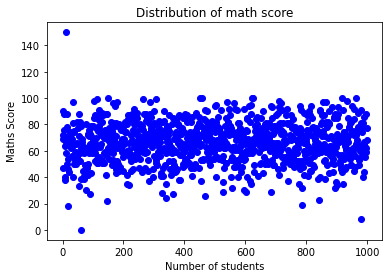

In [14]:
upperlimit=np.percentile(df.math_score.values, 100)
df['math_score'].iloc[df['math_score']>upperlimit]=upperlimit
plt.scatter(range(df.shape[0]), df['math_score'].values, color='blue')
plt.title('Distribution of math score')
plt.xlabel('Number of students')
plt.ylabel('Maths Score')

Score of students in each subject are out of hundred. Thus, no student can get marks beyond hundred. Any student with marks greater than 100 are invalid entry and are considered as outliers. Above scatter plot represents score of individual student. There is one student with marks greater than hundred. Similary the outliers in reading and writing score can be detected.

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Reading Score')

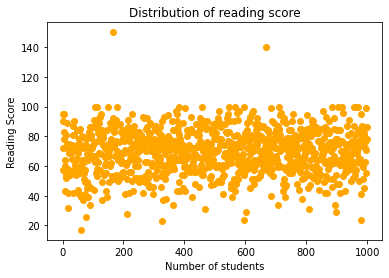

In [15]:
upperlimit=np.percentile(df.reading_score.values, 100)
df['reading_score'].iloc[df['reading_score']>upperlimit]=upperlimit
plt.scatter(range(df.shape[0]), df['reading_score'].values, color='orange')
plt.title('Distribution of reading score')
plt.xlabel('Number of students')
plt.ylabel('Reading Score')

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


Text(0, 0.5, 'Reading Score')

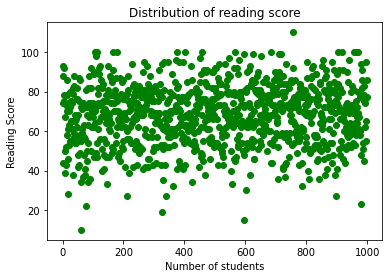

In [16]:
upperlimit=np.percentile(df.writing_score.values, 100)
df['writing_score'].iloc[df['writing_score']>upperlimit]=upperlimit
plt.scatter(range(df.shape[0]), df['writing_score'].values, color='green')
plt.title('Distribution of reading score')
plt.xlabel('Number of students')
plt.ylabel('Reading Score')

# Outlier Value Imputations

Misssing values in the training data set can affect prediction or classification of a model negatively. Also machine learning algorithms cannot accept missing data. All such feed are called outliers. 

In above code there are two ways to deal with outliers:
1. To remove the variables with invalid marks
2. To fill outliers inplace with the mean or median of subject marks

If the particular column with specified marks is removed then the particular student won't be included in the clusttering. However, if the outlying marks are replaced with mean or median of respective score the students would still be considered as a part of dataset fed to machine learning algorithm for clusttering

<AxesSubplot:xlabel='math_score'>

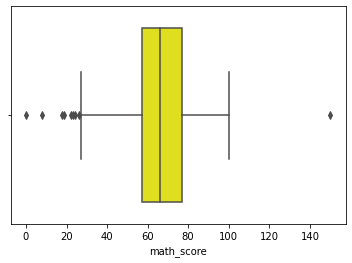

In [17]:
sns.boxplot(x='math_score', data=df, color='yellow')

<AxesSubplot:xlabel='math_score'>

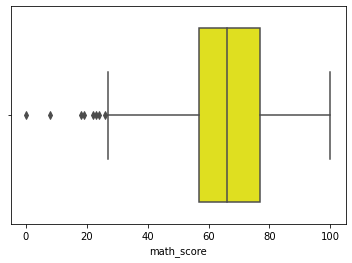

In [47]:
upperlimit=100
df['math_score'].iloc[df['math_score']>upperlimit]=df["math_score"].mean()
sns.boxplot(x='math_score', data=df, color='yellow')

Similarly the remaining two attributes 'reading_score' and 'writing_score' can also be treated.

<AxesSubplot:xlabel='writing_score'>

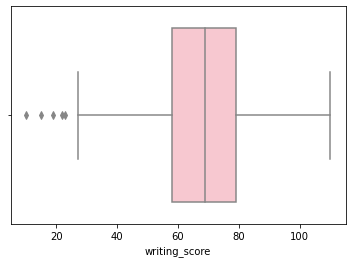

In [19]:
sns.boxplot(x='writing_score', data=df, color='pink')

<AxesSubplot:xlabel='writing_score'>

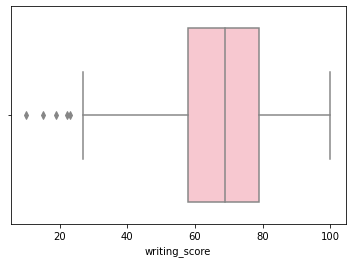

In [48]:
upperlimit=100
df['writing_score'].iloc[df['writing_score']>upperlimit]=df["writing_score"].mean()
sns.boxplot(x='writing_score', data=df, color='pink')

<AxesSubplot:xlabel='reading_score'>

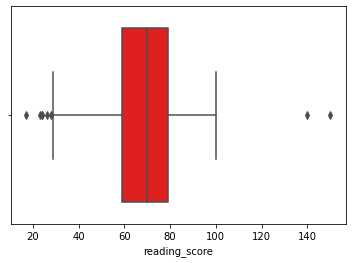

In [21]:
sns.boxplot(x='reading_score', data=df, color='red')

<AxesSubplot:xlabel='reading_score'>

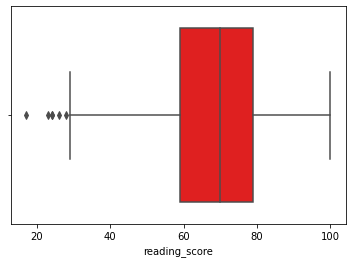

In [49]:
upperlimit=100
df['reading_score'].iloc[df['reading_score']>upperlimit]=df["reading_score"].mean()
sns.boxplot(x='reading_score', data=df, color='red')

Now, all students in above dataset have vales in range 0-100 and there are no outliers.

# Preparing Dataset 

In [23]:
df=df.drop(['RollNo'], axis=1)

In [24]:
df.head()

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


The Roll Number column should be removed from the dataset before fitting into the model since the roll number of students is not a factor responsible for deciding students performance for grouping. 

# K-Means Clusttering 

In [25]:
from sklearn.cluster import KMeans
kmeans=KMeans(n_clusters=4, max_iter=50)
kmeans.fit(df)
y_kmeans=kmeans.predict(df)

In [26]:
y_kmeans

array([0, 1, 1, 2, 0, 0, 1, 2, 3, 2, 3, 3, 0, 0, 3, 0, 1, 2, 2, 3, 3, 0,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 1, 1, 0, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 3, 2, 0, 2, 3, 0, 3, 3,
       2, 0, 3, 3, 3, 3, 2, 3, 2, 2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       3, 1, 0, 2, 0, 2, 1, 1, 3, 0, 3, 3, 0, 0, 1, 2, 1, 3, 1, 3, 3, 0,
       1, 3, 2, 3, 1, 0, 1, 0, 3, 3, 1, 1, 1, 3, 0, 1, 0, 0, 0, 2, 1, 2,
       0, 0, 0, 3, 2, 3, 3, 3, 0, 3, 2, 2, 0, 2, 1, 0, 0, 1, 3, 0, 3, 2,
       3, 1, 0, 3, 0, 3, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 1,
       2, 0, 3, 1, 0, 3, 2, 0, 2, 3, 0, 3, 2, 1, 3, 0, 3, 3, 0, 3, 3, 3,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 2, 3, 3, 1, 1, 1, 2, 0, 3,
       3, 1, 3, 1, 3, 2, 0, 3, 0, 1, 0, 2, 0, 1, 1, 0, 3, 3, 2, 1, 0, 1,
       3, 2, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 3, 2, 2, 0, 1, 0, 1, 3, 0, 3, 2, 2, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 1, 0,

In [27]:
kmeans.labels_

array([0, 1, 1, 2, 0, 0, 1, 2, 3, 2, 3, 3, 0, 0, 3, 0, 1, 2, 2, 3, 3, 0,
       2, 0, 0, 0, 3, 0, 0, 0, 0, 3, 3, 2, 1, 1, 0, 3, 1, 3, 3, 3, 3, 3,
       3, 3, 3, 0, 0, 1, 2, 0, 2, 1, 1, 2, 1, 2, 3, 2, 0, 2, 3, 0, 3, 3,
       2, 0, 3, 3, 3, 3, 2, 3, 2, 2, 2, 0, 0, 3, 2, 2, 2, 3, 2, 0, 1, 0,
       3, 1, 0, 2, 0, 2, 1, 1, 3, 0, 3, 3, 0, 0, 1, 2, 1, 3, 1, 3, 3, 0,
       1, 3, 2, 3, 1, 0, 1, 0, 3, 3, 1, 1, 1, 3, 0, 1, 0, 0, 0, 2, 1, 2,
       0, 0, 0, 3, 2, 3, 3, 3, 0, 3, 2, 2, 0, 2, 1, 0, 0, 1, 3, 0, 3, 2,
       3, 1, 0, 3, 0, 3, 0, 1, 2, 2, 1, 1, 2, 0, 0, 0, 0, 1, 1, 3, 2, 1,
       2, 0, 3, 1, 0, 3, 2, 0, 2, 3, 0, 3, 2, 1, 3, 0, 3, 3, 0, 3, 3, 3,
       2, 0, 0, 0, 0, 3, 2, 0, 0, 0, 0, 3, 0, 2, 3, 3, 1, 1, 1, 2, 0, 3,
       3, 1, 3, 1, 3, 2, 0, 3, 0, 1, 0, 2, 0, 1, 1, 0, 3, 3, 2, 1, 0, 1,
       3, 2, 0, 0, 0, 3, 3, 3, 2, 0, 3, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 1,
       0, 2, 0, 0, 1, 0, 3, 2, 2, 0, 1, 0, 1, 3, 0, 3, 2, 2, 0, 0, 2, 1,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 3, 2, 0, 2, 1, 0,

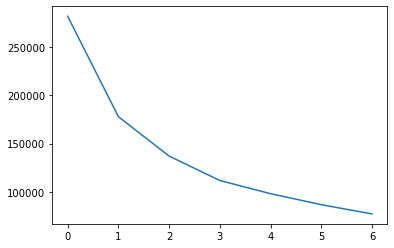

In [28]:
ssd=[]
range_n_clusters=[2,3,4,5,6,7,8]
for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)

In [29]:
range_n_clusters=[2,3,4,5,6,7,8]

for num_clusters in range_n_clusters:
    kmeans=KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(df)
    
    cluster_labels=kmeans.labels_
    
    silhouette_avg=silhouette_score(df, cluster_labels)
    print("for n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

for n_clusters=2, the silhouette score is 0.47210266279908203
for n_clusters=3, the silhouette score is 0.40428456843735244
for n_clusters=4, the silhouette score is 0.34999518628209536
for n_clusters=5, the silhouette score is 0.33225263205995714
for n_clusters=6, the silhouette score is 0.29219649558247873
for n_clusters=7, the silhouette score is 0.3032455954457124
for n_clusters=8, the silhouette score is 0.300324050998222


In [30]:
kmeans=KMeans(n_clusters=3, max_iter=50)
kmeans.fit(df)

KMeans(max_iter=50, n_clusters=3)

In [31]:
#df['Cluster_ID']=kmeans.labels_

In [32]:
df.head()

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


Adding the Column 'RollNo' again to the dataset.

In [33]:
#df['RollNo']=df.index

In [34]:
df.head()

,math_score,reading_score,writing_score
0,72.0,72.0,74.0
1,69.0,90.0,88.0
2,90.0,95.0,93.0
3,47.0,57.0,44.0
4,76.0,78.0,75.0


# Clustering Output

In [35]:
#df[['RollNo','Cluster_ID']]

# Saving Model using Pickle

In [36]:
import pickle

In [37]:
with open('Student_Clustering','wb') as f:
    pickle.dump(df, f)

In [38]:
with open('Student_Clustering', 'rb') as f:
    model=pickle.load(f)


In [39]:
kmeans.predict([[72,72,74]])

array([2])